## 1. 데이터 불러오기

In [ ]:
import json
import pandas as pd
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/boazadv/textrank/final.jsonl', 'r') as json_file:
    json_list = list(json_file)

In [ ]:
 # 확인
 json.loads(json_list[1])

{'original': ' 상고이유를 판단한다.원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한 구 근로기준법1996. 12. 31. 법률 제5245호로 개정되기 전의 것 이하 근로기준법이라고 한다 제30조 소정의 임금청산의무위반의 이 사건 공소사실에 대하여 원심은 그 거시 증거를 종합하여 이삿짐 운송업체를 경영하는 피고인은 상주직원으로 현장소장 강동수 경리직원 이경아 운전기사 박근우 등 3인을 고용하고 있고 이삿짐을 운반하는 5t 탑차와 이사작업에 필요한 장비를 싣는 1t 트럭 1대를 보유하고 있는 사실 피고인은 이삿짐 운송의뢰가 들어오면 전화상담이나 현장답사를 통하여 이삿짐의 부피를 정한 다음 필요한 현장작업자를 일당제로 고용 5인 1조로 구성하여 현장에 파견하는데 현장작업자는 일이 있을 때마다 전화나 호출기 등으로 연락을 하여 현장작업에 투입되고 그들에 대한 노임은 작업당일의 수입에서 필요한 경비를 공제한 뒤 일정비율로 안분하여 지급되는 사실 현장작업자 중에는 위 업체에 자주 출역하는 이른바 고정인부도 있고 그렇지 않은 사람도 있으나 고정인부들이 매일 사무실로 출근할 의무는 없고 출근부도 없으며 단지 위 업체의 일을 자주 하게 된 관계로 일이 있을 경우 우선적으로 그 작업을 맡게 되고 부족한 인원은 그때 그때 연락이 되는대로 다른 곳에서 충원되며 한편 위 고정인부들은 위 업체에 일이 없으면 다른 이삿짐운송업체에도 출역하는 사실 그리고 약 일주일에 걸친 동아대학교 도서관 이전작업시에는 현장소장 강동수의 부탁으로 고정인부인 위 정정수가 일당 4만 원에 대학생 64명을 동원하여 작업을 하였던 사실을 인정한 다음 일당을 지급받기로 하고 도서관 이전작업을 일시 도와 준 대학생들이 피고인과 종속적인 관계에서 근로를 제공한 것으로 볼 수 없음은 물론 위 정정수를 비롯한 이른바 고정인부라고 불리는 현장의 다른 작업자들도 피고인과 전속專屬관계가 없고 근무시간의 구속을 받지 않으며 또 출역하지 않은데 대하여 제재도 받지 아니하고 서로 상대방에 대하여 작업할 

In [ ]:
# 데이터프레임
lines = []
try:
  for json_str in json_list[1:]:
      line = json.loads(json_str)
      lines.append(line)
except:
  print('error occurs')
df = pd.DataFrame(lines)
df.head()

error occurs


,original,summary
0,상고이유를 판단한다.원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대...,"근기법 소정의 ""상시 5인 이상의 근로자를 사용하는 사업 또는 사업장""이란 사용하는..."
1,피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하...,근로기준법의 적용범위로서 사업 또는 사업장이나 근로자는 그 종류를 한정하지 아니하므...
2,1. 상고이유 제1점에 대하여 가. 원고들이 근로자인지 여부근로기준법상의 근로자...,근로기준법상의 근로자는 계약의 형식이 고용계약인지 도급계약인지보다 그 실질에 있어 ...
3,상고이유를 본다. 1. 상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하...,"집행이사가 취업규정상 회사의 직원에 포함되지 않고, 보수 및 처우도 임원과 유사하게..."
4,1. 검사의 상고이유를 본다.원심판결 이유에 의하면 원심은 공소외 1 주식회사은 ...,근로기준법상 사용자라 함은 사업주 또는 사업경영담당자 기타 근로자에 관한 사항에 대...


## 2. 데이터 전처리

### 2-1. 빈칸 제거

In [ ]:
del_list = [idx for idx,text in enumerate(df['original']) if text=="" or text == " "]

In [ ]:
len(del_list)

184

In [ ]:
for d in sorted(del_list, reverse=True):
    del df['original'][d]
    del df['summary'][d]

In [ ]:
df.reset_index(drop = True, inplace = True)

### 2-2. 중복 데이터 제거

In [ ]:
# 중복 데이터 확인
print('원문에서 중복되는 개수 :', len(df)-df['original'].nunique())
print('요약에서 중복되는 개수 :', len(df)-df['summary'].nunique())

원문에서 중복되는 개수 : 317
요약에서 중복되는 개수 : 142


In [ ]:
df.drop_duplicates(subset=['original'], inplace=True)
df.drop_duplicates(subset=['summary'], inplace=True)

In [ ]:
print('원문에서 중복되는 개수 :', len(df)-df['original'].nunique())
print('요약에서 중복되는 개수 :', len(df)-df['summary'].nunique())

원문에서 중복되는 개수 : 0
요약에서 중복되는 개수 : 0


In [ ]:
df.reset_index(drop = True, inplace = True)

### 2-3. 텍스트 전처리

In [ ]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re
from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
def pre_process(sentence):
    sentence = BeautifulSoup(sentence, "lxml").text  # html 테크 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence)    # 괄호 제거
    sentence = re.sub('"','', sentence)              # 쌍따옴표 " 제거
    sentence = re.sub(r'[一-龥]', '', sentence)       # 한자 제거
    sentence = re.sub(r'\d\.', '', sentence)         # 숫자 + . 제거
    sentence = re.sub(r'[①②③④⑤⑥⑦]', '', sentence) # 숫자형식 제거
    sentence = sentence.replace(' 가.', '').replace(' 나.', '').replace(' 다', '').replace(' 라', '').replace(' 마', '').replace(' 바', '').replace(' 사', '').replace(' 아', '')
    # tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    return sentence

In [ ]:
df['original'] = df['original'].progress_apply(lambda x: pre_process(x))
df['summary'] = df['summary'].progress_apply(lambda x: pre_process(x))

100%|██████████| 9394/9394 [00:02<00:00, 3182.78it/s]


In [ ]:
df.head()

,original,summary
0,상고이유를 판단한다.원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한...,근기법 소정의 상시 5인 이상의 근로자를용하는업 또는업장이란용하는 근로자의 수가 상...
1,피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하 ...,근로기준법의 적용범위로서업 또는업장이나 근로자는 그 종류를 한정하지니하므로 종교사업...
2,상고이유 제1점에 대하여 원고들이 근로자인지 여부근로기준법상의 근로자에 해당하는...,근로기준법상의 근로자는 계약의 형식이 고용계약인지 도급계약인지보다 그 실질에 있어 ...
3,상고이유를 본다. 상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하는지 ...,"집행이사가 취업규정상 회사의 직원에 포함되지 않고, 보수 및 처우도 임원과 유사하게..."
4,검사의 상고이유를 본다.원심판결 이유에 의하면 원심은 공소외 1 주식회사은 197...,근로기준법상용자라 함은업주 또는업경영담당자 기타 근로자에 관한항에 대하여업주를 위하...


### 2-4. 문장 단위 분리

In [ ]:
!pip install kss

     |████████████████████████████████| 71kB 5.7MB/s 


In [ ]:
import kss

In [ ]:
def sentence_split(text):
    sen = []
    for sent in kss.split_sentences(text):
      sen.append(sent)
    return sen

In [ ]:
#sentence_split(df['original'][0])

['상고이유를 판단한다.',
 '원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한 구 근로기준법199 1 3 법률 제5245호로 개정되기 전의 것 이하 근로기준법이라고 한다 제30조 소정의 임금청산의무위반의 이건 공소사실에 대하여 원심은 그 거시 증거를 종합하여 이삿짐 운송업체를 경영하는 피고인은 상주직원으로 현장소장 강동수 경리직원 이경아 운전기사 박근우 등 3인을 고용하고 있고 이삿짐을 운반하는 5t 탑차와 이사작업에 필요한 장비를 싣는 1t 트럭 1대를 보유하고 있는실 피고인은 이삿짐 운송의뢰가 들어오면 전화상담이나 현장답사를 통하여 이삿짐의 부피를 정한음 필요한 현장작업자를 일당제로 고용 5인 1조로 구성하여 현장에 파견하는데 현장작업자는 일이 있을 때마다 전화나 호출기 등으로 연락을 하여 현장작업에 투입되고 그들에 대한 노임은 작업당일의 수입에서 필요한 경비를 공제한 뒤 일정비율로 안분하여 지급되는실 현장작업자 중에는 위 업체에 자주 출역하는 이른바 고정인부도 있고 그렇지 않은람도 있으나 고정인부들이 매일무실로 출근할 의무는 없고 출근부도 없으며 단지 위 업체의 일을 자주 하게 된 관계로 일이 있을 경우 우선적으로 그 작업을 맡게 되고 부족한 인원은 그때 그때 연락이 되는대로른 곳에서 충원되며 한편 위 고정인부들은 위 업체에 일이 없으면른 이삿짐운송업체에도 출역하는실 그리고 약 일주일에 걸친 동아대학교 도서관 이전작업시에는 현장소장 강동수의 부탁으로 고정인부인 위 정정수가 일당 4만 원에 대학생 64명을 동원하여 작업을 하였던실을 인정한음 일당을 지급받기로 하고 도서관 이전작업을 일시 도와 준 대학생들이 피고인과 종속적인 관계에서 근로를 제공한 것으로 볼 수 없음은 물론 위 정정수를 비롯한 이른바 고정인부라고 불리는 현장의른 작업자들도 피고인과 전속관계가 없고 근무시간의 구속을 받지 않으며 또 출역하지 않은데 대하여 제재도 받지니하고 서로 상대방에 대하여 작업할 기회를 요구하거나 작업할 권리를 예정하지 않고 있는 점 등으로 미루어 피고인

In [ ]:
df['original'] = df['original'].progress_apply(lambda x: sentence_split(x))
df['summary'] = df['summary'].progress_apply(lambda x: sentence_split(x))

100%|██████████| 9394/9394 [00:54<00:00, 171.23it/s]


In [ ]:
df.head()

,original,summary
0,"[상고이유를 판단한다., 원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에...",[근기법 소정의 상시 5인 이상의 근로자를용하는업 또는업장이란용하는 근로자의 수가 ...
1,[피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하...,[근로기준법의 적용범위로서업 또는업장이나 근로자는 그 종류를 한정하지니하므로 종교사...
2,[상고이유 제1점에 대하여 원고들이 근로자인지 여부근로기준법상의 근로자에 해당하는...,[근로기준법상의 근로자는 계약의 형식이 고용계약인지 도급계약인지보다 그 실질에 있어...
3,"[상고이유를 본다., 상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하는지 ...","[집행이사가 취업규정상 회사의 직원에 포함되지 않고, 보수 및 처우도 임원과 유사하..."
4,"[검사의 상고이유를 본다., 원심판결 이유에 의하면 원심은 공소외 1 주식회사은 1...",[근로기준법상용자라 함은업주 또는업경영담당자 기타 근로자에 관한항에 대하여업주를 위...


In [ ]:
df.to_csv('/content/drive/MyDrive/boazadv/textrank/split.csv', index = False)

In [ ]:
df_split = pd.read_csv('/content/drive/MyDrive/boazadv/textrank/split.csv')

In [ ]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   original  9394 non-null   object
 1   summary   9394 non-null   object
dtypes: object(2)
memory usage: 146.9+ KB


### 2-5. 문장 길이 파악

In [ ]:
df['length'] = df['original'].apply(lambda x: len(x))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


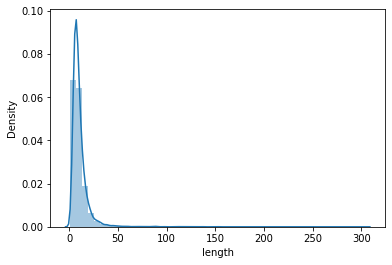

In [ ]:
sns.distplot(df['length'])
plt.show()

In [ ]:
df['length'].describe()

count    9394.000000
mean       10.639770
std        10.031458
min         1.000000
25%         6.000000
50%         8.000000
75%        12.000000
max       304.000000
Name: length, dtype: float64

In [ ]:
pd.set_option('display.max_categories', 500)

In [ ]:
df[df['length']==304]['original']

5309    [피고인들의 변호인들의 상고이유피고인 C의 변호인 R의 보충상고이유는 위 상고이유를...
Name: original, dtype: object

In [ ]:
df.loc[5309,'original']

['피고인들의 변호인들의 상고이유피고인 C의 변호인 R의 보충상고이유는 위 상고이유를 보충하는 범위 내에서 및 검사의 상고이유를래와 같은 순서로 나누어 항목별로 판단한다.',
 '아 래제1장 이른바 12·12 군사반란과 5·18 내란 등건에 공통된 부분   이건 군사반란과 내란의 처벌 문제   공소시효의 완성 여부 등가.',
 '5·18특별법 제2조의 위헌 여부 및 공소시효완성 여부나.',
 '헌법재판소 199  1 선고 96헌가2 96헌마713 결정의 무효 여부   공소권 남용 여부제2장 이른바 12·12 군사반란건 부분   피고인 C D E F G H I J K의 변호인들의 상고이유에 대한 판단가.',
 'S 육군참모총장 체포의 불법성나.',
 '대통령에 대한 강압다.',
 '병력동원의 불법성라.',
 '지휘부의 설치·운영마.',
 '반란의 모의 등바. 명령복종행위의 위법성 및 책임성   검사의 상고이유에 대한 판단가.',
 '지휘관계엄지역수소이탈 및 불법진퇴의 점나.',
 '초병살해 상관살해미수 살인의 점다.',
 '피고인 P의 반란의 점제3장 이른바 5·18 내란 등건 부분   피고인 C D G H I L M N의 변호인들의 상고이유에 대한 판단가.',
 '국헌문란의 목적나.',
 '폭동성다.',
 '내란의 모의와 실행행위 가담라.',
 '내란목적살인마.',
 '내란죄의 종료시기바. 군사반란사. 위법성조각사유 등   검사의 상고이유에 대한 판단가.',
 '광주교도소의 방어 부분과 관련한 내란 및 내란목적살인의 점나.',
 '자위권발동과 관련한 내란목적살인의 점다.',
 '반란의 점라.',
 '불법진퇴의 점제4장 뇌물건 부분   피고인 N의 변호인들의 상고이유에 대한 판단   검사의 상고이유에 대한 판단가.',
 '피고인 A나.',
 '피고인 O제5장 피고인 Q 부분제6장 결 론제7장 소수의견   이건 군사반란 및 내란이법심사의 대상이 되지니한다는 대법관 박만호의 반대의견   5·18특별법의 위헌 여부와 공소시효완성 여부에 관한 대법관 박만호 대법관 박준

In [ ]:
df[df['length']<=2]

,original,summary,length
410,"[피고소송대리인의 상고이유에 대하여 살피기로 한다., 원심이 인정한실에 의하면 피고...",[조합이 설립되기 전의 설립중인 조합 발기인들이 관청에서 하는 부당한 가구등의 도급...,2
477,[단체의 정관에 따른 의사결정기관의 구성원이 그 지위에 기하여 위 단체를 상대로 그...,[소송 계속중에망하였거나 승소 확정판결을 받은 후 그에 대한 재심소송 계속 중에망하...,2
844,"[피고 소송대리인의 상고이유에 대하여 판단한다., 민법 제124조의 해석상 본인의 ...",[특정한 법률행위에 관하여 본인의 승락이 있으면 당사자 쌍방을 대리할 수 있다.],2
1257,[원고의 상고이유에 대한 판단신민법 부칙 제10조 제1항에 의하면 신민법 시행 이전...,"[민법상 당사자의 원용이 없어도 시효완성의실로서 채무는 당연히 소멸되고,만 변론주의...",2
1346,[상고이유에 대하여원심이 설시사실 관계에탕하여 토지수용법 등에 의한 토지수용의 경우...,[토지수용의 경우 기업자가 과실 없이 진정한 토지소유자를 알지 못하여 등기부상 소유...,2
...,...,...,...
8689,"[검사의 상고 이유를 판단한다., 원판결 이유에 의하면 원심은 본건 변소는 피고인의...",[승낙을 얻어 타인의 변소를용하는 권리는 채권적인용관계이고 점유권을 내용으로 하는 ...,2
8788,[상고이유의 요지는피고인이 문화까스주식회사를 양수함에 있어 대표이사로 부터 전권을 ...,"[주권발행의 권한을 위임받았다, 하더라도 발행일자를 소급시킴으로써 허위내용이 된 때...",2
8792,[허위작성유가증권행사죄 또는 위조유가증권행사죄에 있어서의 유가증권이라 함은 허위작성...,[허위작성유가증권행사죄 또는 위조유가증권행사죄에 있어서 유가증권이라 함은 허위작성 ...,2
8842,[기록에 의하면 피고인은 제1심판결에 대하여 양형부당만을 항소이유로 내세워 항소하였...,[주취운전자 적발보고서 및 주취운전자 정황진술보고서의 각 운전자란에 타인의 서명을 ...,2


In [ ]:
stay_index = df.loc[df['length']<=2].index

In [ ]:
df.drop(5309, axis = 0, inplace=True)
df.drop(df.loc[df['length']<=2].index, inplace=True)

In [ ]:
df.reset_index(drop = True, inplace=True)

In [ ]:
df.head()

,original,summary,length
0,"[상고이유를 판단한다., 원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에...",[근기법 소정의 상시 5인 이상의 근로자를용하는업 또는업장이란용하는 근로자의 수가 ...,6
1,[피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하...,[근로기준법의 적용범위로서업 또는업장이나 근로자는 그 종류를 한정하지니하므로 종교사...,6
2,[상고이유 제1점에 대하여 원고들이 근로자인지 여부근로기준법상의 근로자에 해당하는...,[근로기준법상의 근로자는 계약의 형식이 고용계약인지 도급계약인지보다 그 실질에 있어...,16
3,"[상고이유를 본다., 상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하는지 ...","[집행이사가 취업규정상 회사의 직원에 포함되지 않고, 보수 및 처우도 임원과 유사하...",9
4,"[검사의 상고이유를 본다., 원심판결 이유에 의하면 원심은 공소외 1 주식회사은 1...",[근로기준법상용자라 함은업주 또는업경영담당자 기타 근로자에 관한항에 대하여업주를 위...,16


### 2-6. 불용어

In [ ]:
lines = []

In [ ]:
for contents in df['original']:
    for k in range(len(contents)):
        lines.append(contents[k])

In [ ]:
df_line = pd.DataFrame(lines, columns = ['line'])
df_count = pd.DataFrame(df_line['line'].value_counts().sort_values(ascending=False))
del_list = df_count[df_count['line']>10].index

In [ ]:
del_list

Index(['상고이유를 판단한다.', '상고이유를 본다.', '할 것이다.', '논지는 이유 없다.', '할 수 없다.',
       '그러므로 상고를 기각하고 상고비용은 패소자의 부담으로 하기로 하여 관여 법관의 일치된 의견으로 주문과 같이 판결한다.',
       '논지는 이유없다.', '그러므로 상고를 기각하기로 하여 관여 법관의 일치된 의견으로 주문과 같이 판결한다.',
       '그러므로 상고를 기각하기로 하여 관여 대법관의 일치된 의견으로 주문과 같이 판결한다.', '논지는 모두 이유 없다.',
       ...
       '할 것이고 이 점을 지적하는 상고이유의 주장은 이유 있다.',
       '그러므로 상고를 모두 기각하고 상고비용은 패소자의 부담으로 하기로 하여 관여 법관의 일치된 의견으로 주문과 같이 판결한다.',
       '이 점에 관한 상고이유는 모두 받아들일 수 없다.',
       '이에 상고를 기각하고 상고비용은 패소한 피고의 부담으로 하기로 관여 법관의 의견이 일치되어 주문과 같이 판결한다.',
       '결론그러므로 원심판결을 파기하고건을시 심리·판단하도록 원심법원에 환송하기로 하여 관여 대법관의 일치된 의견으로 주문과 같이 판결한다.',
       '피고인 및 변호인의 상고이유를 함께 판단한다.',
       '그러므로 상고를 모두 기각하고 상고비용은 패소자들이 부담하도록 하여 관여 법관의 일치된 의견으로 주문과 같이 판결한다.',
       '그러므로 상고를 기각하고 상고 소송비용은 패소자의 부담으로 하기로 관여법관의 의견이 일치되어 주문과 같이 판결한다.',
       '그러므로 원심판결을 파기하고건을시 심리·판단하게 하기 위하여 원심법원에 환송하기로 관여 대법관의 의견이 일치되어 주문과 같이 판결한다.',
       '할 것이므로 이 점을 지적하는 논지는 이유있다.'],
      dtype='object', length=241)

In [ ]:
df_copy = df.copy()

In [ ]:
for i in tqdm(range(len(df_copy['original']))):
    drop_list = []
    for j in range(len(df_copy['original'][i])):
        if df_copy['original'][i][j] in del_list:
            drop_list.append(j)

    for k in drop_list:
        del df_copy['original'][i][k]

100%|██████████| 9330/9330 [00:00<00:00, 12469.54it/s]


In [ ]:
df_copy['original']

0       [원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한 구 근로기준법19...
1       [피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하...
2       [상고이유 제1점에 대하여  원고들이 근로자인지 여부근로기준법상의 근로자에 해당하는...
3       [상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하는지 여부를 판단함에 있어...
4       [원심판결 이유에 의하면 원심은 공소외 1 주식회사은 197  2 건설관련 기술용역...
                              ...                        
9325    [원심판결 이유를 기록에 비추어 살펴보면 판시와 같은정을 들어 피고인의 심신장애에 ...
9326    [아동·청소년의 성보호에 관한 법률이하동·청소년성보호법’이라고 한다이 정한 공개명령...
9327    [교통사고처리 특례법이하 특례법’이라고 한다이 차의 교통으로 형법 제268조의 업무...
9328    [구 풍속영업의 규제에 관한 법률201  2 법률 제10377호로 개정되기 전의 것...
9329    [상고이유상고이유서 제출기간이 경과한 후에 제출된 의견서의 기재는 상고이유를 보충하...
Name: original, Length: 9330, dtype: object

In [ ]:
df_copy['new_length'] = df_copy['original'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


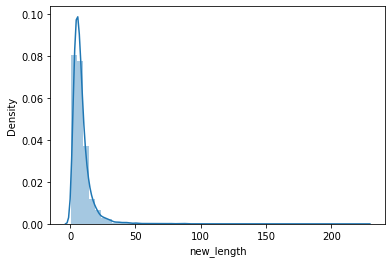

In [ ]:
sns.distplot(df_copy['new_length'])
plt.show()

In [ ]:
new_lines = []

In [ ]:
for contents in df_copy['original']:
    for k in range(len(contents)):
        new_lines.append(contents[k])

In [ ]:
new_line = pd.DataFrame(new_lines, columns = ['line'])
new_count = pd.DataFrame(new_line['line'].value_counts().sort_values(ascending=False))
new_count

,line
그러므로 상고를 기각하고 상고 후의 구금일수 중 일부를 본형에 산입하기로 하여 관여 대법관의 일치된 의견으로 주문과 같이 판결한다.,10
그러므로 상고를 모두 기각하고 상고비용은 패소자들이 부담하기로 하여 관여 대법관의 일치된 의견으로 주문과 같이 판결한다.,10
그러므로 원심결정을 파기하고건을시 심리·판단하게 하기 위하여 원심법원에 환송하기로 하여 관여 대법관의 일치된 의견으로 주문과 같이 결정한다.,10
그러므로 상고를 모두 기각하고 상고비용은 패소자가 부담하기로 하여 관여 대법관의 일치된 의견으로 주문과 같이 판결한다.,10
이 점 상고이유도 받아들일 수 없다.,10
...,...
변호인의 상고이유 제1 2점에 대하여형법 제20조 소정의회상규에 위배되지니하는 행위라 함은 법질서 전체의 정신이나 그 배후에 놓여 있는회윤리 내지회통념에 비추어 용인될 수 있는 행위를 말하고 어떠한 행위가회상규에 위배되지니하는 정당한 행위로서 위법성이 조각되는 것인지는 구체적인정래서 합목적적 합리적으로 고찰하여 개별적으로 판단되어야 할 것인바 이와 같은 정당행위를 인정하려면 첫째 그 행위의 동기나 목적의 정당성 둘째 행위의 수단이나 방법의 상당성 셋째 보호이익과 침해이익과의 법익균형성 넷째 긴급성섯째 그 행위 외에른 수단이나 방법이 없다는 보충성 등의 요건을 갖추어야 한다 대법원 200 2 선고 98도2389 판결 대법원 200 1 2 선고 2007도6243 판결 등 참조.원심판결 이유에 의하면 원심은 피고인이 속칭 생일빵'을 한다는 명목 하에 피해자를 판시와 같이 가격하였다면 폭행죄가 성립한다고 판단하였는바 원심이 들고 있는 가격행위의 동기 방법 횟수 등의 제반정에 비추어 보면 원심의 위 판단은 앞에서 본 법리에 따른 것으로서 옳고 거기에 폭행죄나 정당행위에 관한 법리를 오해한 위법 등이 없다.,1
또한 갑 제1호증의 기재에 의하면 이건 점포에 대한 임대차계약을 체결함에 있어 “임차인은 영업시설 설치에 지출된 필요비 유지비 등 일체의 비용을 청구하지 못하며 유치권도 행사하지니하고 연고권도 주장하지니한다”고 약정한실이 인정되는바 이러한 약정은 그 문면상 임차인이 당해 점포에 영업시설을 설치함으로써 들인 필요비 유익비 등을 임대인에게 청구하지 않고 이를 포기하며 또한 임차인이 설사 전임차인으로부터 권리금을 지급하고 임차권을 양도받은 경우라도 그 권리금을 임대인에게 주장하지 않고 기간 만료된 경우 원상으로 회복하여 주겠다는 취지의 약정이라고 할 것이나 이러한 약정은 임대차계약이 계약대로 이행되어 기간이 만료된 경우나 임차인의 채무불이행예컨데 임료의 지체으로 계약이 해지되는 경우 등에 적용되는 약정이지 이건에 있어서와 같이 임대인이 임차권의 양도를 승낙하여 임차권을 양도받은 원고가 그 승낙의 내용에 따라 맥주판매점으로 내부공사를 하는 것을 임대인측에서 방해하여 영업을 개시 조차 못하게 함으로써 발생한 채무불이행 및 불법행위로 인한 손해배상의 범위를 정함에 있어서 적용되는 약정이라고 할 수 없으므로 피고들이 위 규정을 들어 원고가 전임차인에게 시설비 명목으로 지급한 금원 및 내부시설공사비 상당의 손해의 배상을 거절할 수는 없다고 보아야 할 것이고 따라서 원심이 내부시설공사비 금 18000000원에 대하여 위와 같은 취지로 판단하면서 그 배상을 명하였음은 정당하고 원심판결에 소론과 같이 당사자이의 의사표시를 잘못 해석한 위법이나 이유불비 이유모순의 위법이 있다고 할 수 없다.,1
다음으로 위 피고인이 공소외 4로부터 이건 도청자료를 취득하는 과정에서 어떠한 범죄행위도 자행하지니하였음은 명백하다.,1
따라서 시흥소방서의 담당 소방공무원이 피고인에게 행정처분인 위 시정보완명령을 구두로 고지한 것은 행정절차법 제24조에 위반한 것으로 그 하자가 중대하고 명백하여 위 시정보완명령은 당연 무효라고 할 것이고 무효인 위 시정보완명령에 따른 피고인의 의무위반이 생기지니하는 이상 피고인에게 위 시정보완명령에 위반하였음을 이유로 소방시설 설치유치 및 안전관리에 관리에 관한 법률 제48조의2 제1호에 따른 행정형벌을 부과할 수 없다.,1


In [ ]:
re.sub(r' 다.', '', '제 2조에 의하여 가. 이렇다 나. 저렇다 다. 요렇다.')

'제 2조에 의하여 가. 이렇다 나. 저렇다 요렇다.'

In [ ]:
a = '제 2조에 의하여 가. 이렇다 나. 저렇다 다. 요렇다.'
a.replace(' 다.','')

'제 2조에 의하여 가. 이렇다 나. 저렇다 요렇다.'

## 3. Textrank

### 3-1. Mecab

In [ ]:
%cd /content/
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
! bash install_mecab-ko_on_colab190912.sh

/content
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-04-08 11:14:36--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.


### 3-2. Textrank

In [ ]:
import networkx
import re
from konlpy.tag import Mecab

In [ ]:
# Textrank 요약 
class TextRank:
    def __init__(self, **kargs):
        self.graph = None
        self.window = kargs.get('window', 5)
        self.coef = kargs.get('coef', 1.0)
        self.threshold = kargs.get('threshold', 0.005)
        self.dictCount = {}
        self.dictBiCount = {}
        self.dictNear = {}
        self.nTotal = 0
 
    def loadSents(self, sentenceIter, tokenizer = Mecab()):
        import math
        def similarity(a, b):
            n = len(a.intersection(b))
            return n / float(len(a) + len(b) - n) / (math.log(len(a)+1) * math.log(len(b)+1))
 
        if not tokenizer: rgxSplitter = re.compile('[\\s.,:;-?!()"\']+')
        sentSet = []
        for sent in filter(None, sentenceIter):
            if type(sent) == str:
                if tokenizer: s = set(filter(None, tokenizer(sent)))
                else: s = set(filter(None, rgxSplitter.split(sent)))
            else: s = set(sent)
            # 해당 문장을 토크나이저로 자른 형태들, 2보다 작다면 이는 여기서 NNG, NN, VV, VA을 포함하는 요소가 아예 없거나 하나밖에 없다는 뜻
            if len(s) < 2: continue
            self.dictCount[len(self.dictCount)] = sent
            sentSet.append(s)
            # sentSet : {('아버지', 'NNG'), ('식당', 'NNG')} 등의 형태로 문장의 토큰들을 저장한 곳
 
        # 모든 문장의 조합에 대해서 similarity 계산 후 dicBiCount에 저장
        for i in range(len(self.dictCount)):
            for j in range(i+1, len(self.dictCount)):
                s = similarity(sentSet[i], sentSet[j])
                if s < self.threshold: continue
                self.dictBiCount[i, j] = s
 
    def build(self):
        self.graph = networkx.Graph()
        self.graph.add_nodes_from(self.dictCount.keys())
        for (a, b), n in self.dictBiCount.items():
            self.graph.add_edge(a, b, weight=n*self.coef + (1-self.coef))
 
    def rank(self):
        return networkx.pagerank(self.graph, weight='weight')
 
    def summarize(self, ratio = 0.333):
        r = self.rank()
        ks = sorted(r, key=r.get, reverse=True)
        # score = int(len(r)*ratio)

        # 문장 수
        # if score < 3 : 
        #    score = len(r) 
        #elif score >= 3:
        #    score = 3
        #else:
        #    pass
        score = 3


        ks = ks[:score]
        return ' '.join(map(lambda k:self.dictCount[k], sorted(ks)))

In [ ]:
tr = TextRank()
tagger = Mecab()
stopword = set([('있', 'VV'), ('하', 'VV'), ('되', 'VV') ])
tr.loadSents(df_copy['original'][0], lambda sent: filter(lambda x:x not in stopword and x[1] in ('NNG', 'NNP', 'VV', 'VA'), tagger.pos(sent)))

In [ ]:
df_copy['original'][0]

['원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한 구 근로기준법199 1 3 법률 제5245호로 개정되기 전의 것 이하 근로기준법이라고 한다 제30조 소정의 임금청산의무위반의 이건 공소사실에 대하여 원심은 그 거시 증거를 종합하여 이삿짐 운송업체를 경영하는 피고인은 상주직원으로 현장소장 강동수 경리직원 이경아 운전기사 박근우 등 3인을 고용하고 있고 이삿짐을 운반하는 5t 탑차와 이사작업에 필요한 장비를 싣는 1t 트럭 1대를 보유하고 있는실 피고인은 이삿짐 운송의뢰가 들어오면 전화상담이나 현장답사를 통하여 이삿짐의 부피를 정한음 필요한 현장작업자를 일당제로 고용 5인 1조로 구성하여 현장에 파견하는데 현장작업자는 일이 있을 때마다 전화나 호출기 등으로 연락을 하여 현장작업에 투입되고 그들에 대한 노임은 작업당일의 수입에서 필요한 경비를 공제한 뒤 일정비율로 안분하여 지급되는실 현장작업자 중에는 위 업체에 자주 출역하는 이른바 고정인부도 있고 그렇지 않은람도 있으나 고정인부들이 매일무실로 출근할 의무는 없고 출근부도 없으며 단지 위 업체의 일을 자주 하게 된 관계로 일이 있을 경우 우선적으로 그 작업을 맡게 되고 부족한 인원은 그때 그때 연락이 되는대로른 곳에서 충원되며 한편 위 고정인부들은 위 업체에 일이 없으면른 이삿짐운송업체에도 출역하는실 그리고 약 일주일에 걸친 동아대학교 도서관 이전작업시에는 현장소장 강동수의 부탁으로 고정인부인 위 정정수가 일당 4만 원에 대학생 64명을 동원하여 작업을 하였던실을 인정한음 일당을 지급받기로 하고 도서관 이전작업을 일시 도와 준 대학생들이 피고인과 종속적인 관계에서 근로를 제공한 것으로 볼 수 없음은 물론 위 정정수를 비롯한 이른바 고정인부라고 불리는 현장의른 작업자들도 피고인과 전속관계가 없고 근무시간의 구속을 받지 않으며 또 출역하지 않은데 대하여 제재도 받지니하고 서로 상대방에 대하여 작업할 기회를 요구하거나 작업할 권리를 예정하지 않고 있는 점 등으로 미루어 피고인과이에 종속적 근로관계를 인정

In [ ]:
tr.build()
ranks = tr.rank()
for k in sorted(ranks, key=ranks.get, reverse=True)[:100]:
    print("\t".join([str(k), str(ranks[k]), str(tr.dictCount[k])]))
print(tr.summarize(0.2))

3	0.26737349719839926	그럼에도 불구하고 원심이 일당제로 이삿짐운반작업에용된 고정인부등을 배제한 채 상주직원 3인 외에는 그 판시와 같이 상시 근로자가 없다고 하여 위 업체는 근로기준법이 적용되는업 또는업장이 될 수 없다고 단정한 것은 근로기준법 제10조 제1항의 상시 5인 이상의 근로자를용하는업 또는업장에 관한 법리를 오해하거나 이 점에 대한 심리를하지니한 위법이 있다고 할 것이고 이를 지적하는 상고이유의 주장은 이유 있다.
2	0.24924730735290518	그리고 근로기준법의 적용 범위를 정한 동법 제10조 제1항 소정의 상시 5인 이상의 근로자를용하는업 또는업장이라 함은 상시 근무하는 근로자의 수가 5인 이상인업 또는업장이니라용하는 근로자의 수가 상시 5인 이상인업 또는업장을 뜻하는 것이고 이 경우 상시라 함은 상태라고 하는 의미로서 근로자의 수가 때때로 5인 미만이 되는 경우가 있어도회통념에 의하여 객관적으로 판단하여 상태적으로 5인 이상이 되는 경우에는 이에 해당한다 할 것이고 여기의 근로자에는 당해업장에 계속 근무하는 근로자뿐만니라 그때 그때의 필요에 의하여용하는 일용근로자를 포함한다고 해석하여야 할 것이다대법원 198  1 선고 87도153 판결 198  2 선고 87다카831 판결 199  1 선고 93다42238 판결 등 참조.그런데 기록에 의하면 피고인은 1996년 1월 중에 위 도서관이전작업작업일자는 1월 22일부터 1월 26일까지 및 1월 29일이다을 포함하여 1월 6일 1월 7일 1월 9일 1월 14일부터 1월 18일까지 1월 22일부터 1월 31일까지 16일간 모두 20회1월 17일과 1월 22일에는 각 2회의 이삿짐운반작업을 하였고 그 중 1월 6일과 1월 31일의 작업 및 도서관이전작업을 제외한 나머지 작업에는 이른바 고정인부들을 포함하여 적어도 2인 이상의 일용근로자를용하였는바 1996년 1월 중의 작업빈도가 이례적으로 많은 경우가니라면 위와 같은 작업횟수와 작업일수 작업시용된 일용근로자의 인원 이삿짐운반업의

In [ ]:
tr = TextRank()
tagger = Mecab()
stopword = set([('있', 'VV'), ('하', 'VV'), ('되', 'VV') ])
tr.loadSents(df_copy['original'][1], lambda sent: filter(lambda x:x not in stopword and x[1] in ('NNG', 'NNP', 'VV', 'VA'), tagger.pos(sent)))
tr.build()
ranks = tr.rank()
line1 = tr.summarize(0.2)

In [ ]:
df_copy['original'][1]

['피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하 참가인교회라고 한다로 부터 1992 징계해고를 당한 원고가 위 해고가 부당해고라는 이유로 충청남도 지방노동위원회에 구제신청을 하여 구제명령을 받았으나 이어 피고는 동 년 1 참가인교회는 근로기준법 적용대상인업 또는업장이니라는 이유로 위 지방노동위원회의 판정을 취소하고 원고의 구제신청을 각하한 판정을 내렸으며 이에 대하여 원고가 위 재심판정의 취소를 구하는 이건에 있어서 원심은 채택증거에 의하여 참가인교회에 상시 고용된 근로자는 피고가 근로자로 인정한 청소 및 비품관리 등의 업무를 담당하는찰집사 1명 일반서무 등을 담당하는무원 1명 버스운전기사 1명 이외에도 참가인교회 산하의 유치원선교원에서 유아교육을 담당하는 유치원 교사 4명 또한 참가인교회에 근로를 제공하고 그 대가로 임금을 수령하는 근로자에 해당되어 합계 7인의 근로자가 있으므로 참가인교회는 근로기준법 제10조 소정의업 또는업장에 해당되며 따라서 원고는 동법 제27조의3에 의하여 부당해고구제신청을 할 수 있는 것이므로 재심판정을 취소한다고 판시 하였다.',
 '근로기준법의 적용범위를 규정한 근로기준법 제10조 소정의업 또는업장이나 근로자를 정의한 동법 제14조 소정의 직업은 그 종류를 한정하고 있지니하므로 종교사업도 위 각 조문의업이나업장 또는 직업에 해당된다 할 것이고 임금을 정의한 동법 제18조에 의하면 임금이라 함은 그 명칭을 불문하고 근로의 대상으로용자로부터 받는 일체의 금품을 말하는 것이므로 원심이 참가인교회 산하의 유치원 교사 4명은 참가인교회에 근로를 제공하고 그 대가로 참가인교회로부터 임금을 수령하는 근로자라고 판시한 것은 정당하고 논지가 지적하는와 같은 이유불비 내지실오인이나 법리오해의 위법이 있다',
 '또한 피고의 재심판정이 참가인교회의 원고에 대한 징계해고가 정당한 것인지의 본안에 관하여 살피지니한 채 원고의 구제신청이 부적법하다는 이유로 초심판정을 취소하고 구제신청을 각하한 것인 이상 원심의 판단대

In [ ]:
line1

'피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하 참가인교회라고 한다로 부터 1992 징계해고를 당한 원고가 위 해고가 부당해고라는 이유로 충청남도 지방노동위원회에 구제신청을 하여 구제명령을 받았으나 이어 피고는 동 년 1 참가인교회는 근로기준법 적용대상인업 또는업장이니라는 이유로 위 지방노동위원회의 판정을 취소하고 원고의 구제신청을 각하한 판정을 내렸으며 이에 대하여 원고가 위 재심판정의 취소를 구하는 이건에 있어서 원심은 채택증거에 의하여 참가인교회에 상시 고용된 근로자는 피고가 근로자로 인정한 청소 및 비품관리 등의 업무를 담당하는찰집사 1명 일반서무 등을 담당하는무원 1명 버스운전기사 1명 이외에도 참가인교회 산하의 유치원선교원에서 유아교육을 담당하는 유치원 교사 4명 또한 참가인교회에 근로를 제공하고 그 대가로 임금을 수령하는 근로자에 해당되어 합계 7인의 근로자가 있으므로 참가인교회는 근로기준법 제10조 소정의업 또는업장에 해당되며 따라서 원고는 동법 제27조의3에 의하여 부당해고구제신청을 할 수 있는 것이므로 재심판정을 취소한다고 판시 하였다. 근로기준법의 적용범위를 규정한 근로기준법 제10조 소정의업 또는업장이나 근로자를 정의한 동법 제14조 소정의 직업은 그 종류를 한정하고 있지니하므로 종교사업도 위 각 조문의업이나업장 또는 직업에 해당된다 할 것이고 임금을 정의한 동법 제18조에 의하면 임금이라 함은 그 명칭을 불문하고 근로의 대상으로용자로부터 받는 일체의 금품을 말하는 것이므로 원심이 참가인교회 산하의 유치원 교사 4명은 참가인교회에 근로를 제공하고 그 대가로 참가인교회로부터 임금을 수령하는 근로자라고 판시한 것은 정당하고 논지가 지적하는와 같은 이유불비 내지실오인이나 법리오해의 위법이 있다 또한 피고의 재심판정이 참가인교회의 원고에 대한 징계해고가 정당한 것인지의 본안에 관하여 살피지니한 채 원고의 구제신청이 부적법하다는 이유로 초심판정을 취소하고 구제신청을 각하한 것인 이상 원심의 판단대상은 원고의 구제

### 3-3. 결과

In [ ]:
from tqdm import tqdm

In [ ]:
tagger = Mecab()
stopword = set([('있', 'VV'), ('하', 'VV'), ('되', 'VV') ])
result = []
for lines in tqdm(df_copy['original']):
    tr = TextRank()
    tr.loadSents(lines, lambda sent: filter(lambda x:x not in stopword and x[1] in ('NNG', 'NNP', 'VV', 'VA'), tagger.pos(sent)))
    tr.build()
    ranks = tr.rank()
    result.append(tr.summarize(0.2))

100%|██████████| 9330/9330 [02:23<00:00, 65.02it/s] 


In [ ]:
result

['그러나 원심판결 이유에 의하더라도 이른바 고정인부들은 피고인에 대하여 지고 있는 근로제공의무를 이행하기 위해서가니라 일감을 구하여무실에 출근하는 것이고 일감이 있어 일당제로 고용되어야 비로소 당일의 이삿짐운반작업을 하게 된다는 것이므로무실 출근 여부가 자유롭고른 이삿짐운송업체에도 출역한다는 등 원심이 고정인부들과 피고인간의 종속적 근로관계를 부인하는 근거로 들고 있는유는 고정인부들의 근로제공의무의 발생원인이 되는 고용계약이 성립되기 전이거나 이들이 고용되지니하였을 때의정에 불과하여 현실적으로 근로의 제공 및 수령이 이루어지고 있는 당사자 간에 있어서 그 존부가 문제되는용종속성에 관한 판단자료로 삼을 수는 없고 오히려 위와 같은 고정인부들은 일용근로자인 것이고 일당을 목적으로 위 도서관이전작업을 한 대학생 역시찬가지로서 모두 근로기준법상의 근로자에 해당한다고 할 것이다. 그리고 근로기준법의 적용 범위를 정한 동법 제10조 제1항 소정의 상시 5인 이상의 근로자를용하는업 또는업장이라 함은 상시 근무하는 근로자의 수가 5인 이상인업 또는업장이니라용하는 근로자의 수가 상시 5인 이상인업 또는업장을 뜻하는 것이고 이 경우 상시라 함은 상태라고 하는 의미로서 근로자의 수가 때때로 5인 미만이 되는 경우가 있어도회통념에 의하여 객관적으로 판단하여 상태적으로 5인 이상이 되는 경우에는 이에 해당한다 할 것이고 여기의 근로자에는 당해업장에 계속 근무하는 근로자뿐만니라 그때 그때의 필요에 의하여용하는 일용근로자를 포함한다고 해석하여야 할 것이다대법원 198  1 선고 87도153 판결 198  2 선고 87다카831 판결 199  1 선고 93다42238 판결 등 참조.그런데 기록에 의하면 피고인은 1996년 1월 중에 위 도서관이전작업작업일자는 1월 22일부터 1월 26일까지 및 1월 29일이다을 포함하여 1월 6일 1월 7일 1월 9일 1월 14일부터 1월 18일까지 1월 22일부터 1월 31일까지 16일간 모두 20회1월 17일과 1월 22일에는 각 2회의 이삿짐운반작

In [ ]:
df_copy['result'] = result

In [ ]:
df_copy.head()

,original,summary,length,new_length,result
0,[원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한 구 근로기준법19...,[근기법 소정의 상시 5인 이상의 근로자를용하는업 또는업장이란용하는 근로자의 수가 ...,6,5,그러나 원심판결 이유에 의하더라도 이른바 고정인부들은 피고인에 대하여 지고 있는 근...
1,[피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하...,[근로기준법의 적용범위로서업 또는업장이나 근로자는 그 종류를 한정하지니하므로 종교사...,6,4,피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하 ...
2,[상고이유 제1점에 대하여 원고들이 근로자인지 여부근로기준법상의 근로자에 해당하는...,[근로기준법상의 근로자는 계약의 형식이 고용계약인지 도급계약인지보다 그 실질에 있어...,16,16,원고들은 1985년 내지 1991년부터 1999년 12월 내지 2001년 2월까지 ...
3,[상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하는지 여부를 판단함에 있어...,"[집행이사가 취업규정상 회사의 직원에 포함되지 않고, 보수 및 처우도 임원과 유사하...",9,7,대법원 199 1 선고 91누11490 판결 200 2 선고 2002다64681...
4,[원심판결 이유에 의하면 원심은 공소외 1 주식회사은 197 2 건설관련 기술용역...,[근로기준법상용자라 함은업주 또는업경영담당자 기타 근로자에 관한항에 대하여업주를 위...,16,14,할 것이므로 이 점을 지적하는 상고논지는 이유가 있다. 피고인 1의 상고이유를 본다...


In [ ]:
df_copy.to_csv('/content/drive/My Drive/boazadv/textrank/textrank_result_ver3.csv', encoding = 'CP949', index = False)

## 4. 결과확인

In [ ]:
df = pd.read_csv('/content/drive/My Drive/boazadv/textrank/textrank_result_ver3.csv', encoding = 'CP949')

In [ ]:
df.head()

,original,summary,length,new_length,result
0,['원심판결 이유에 의하면 피고인의 공소외 정정수 등 65명에 대한 구 근로기준법1...,['근기법 소정의 상시 5인 이상의 근로자를용하는업 또는업장이란용하는 근로자의 수가...,6,5,그러나 원심판결 이유에 의하더라도 이른바 고정인부들은 피고인에 대하여 지고 있는 근...
1,['피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이...,['근로기준법의 적용범위로서업 또는업장이나 근로자는 그 종류를 한정하지니하므로 종교...,6,4,피고소송수행자 및 피고보조참가인 소송대리인의 상고이유에 대하여피고보조참가인교회이하 ...
2,['상고이유 제1점에 대하여 원고들이 근로자인지 여부근로기준법상의 근로자에 해당하...,['근로기준법상의 근로자는 계약의 형식이 고용계약인지 도급계약인지보다 그 실질에 있...,16,16,원고들은 1985년 내지 1991년부터 1999년 12월 내지 2001년 2월까지 ...
3,['상고이유 제1점에 대한 판단근로기준법상의 근로자에 해당하는지 여부를 판단함에 있...,"['집행이사가 취업규정상 회사의 직원에 포함되지 않고, 보수 및 처우도 임원과 유사...",9,7,대법원 199 1 선고 91누11490 판결 200 2 선고 2002다64681...
4,['원심판결 이유에 의하면 원심은 공소외 1 주식회사은 197 2 건설관련 기술용...,['근로기준법상용자라 함은업주 또는업경영담당자 기타 근로자에 관한항에 대하여업주를 ...,16,14,할 것이므로 이 점을 지적하는 상고논지는 이유가 있다. 피고인 1의 상고이유를 본다...


In [ ]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [ ]:
df.loc[0,'result']

'그러나 원심판결 이유에 의하더라도 이른바 고정인부들은 피고인에 대하여 지고 있는 근로제공의무를 이행하기 위해서가니라 일감을 구하여무실에 출근하는 것이고 일감이 있어 일당제로 고용되어야 비로소 당일의 이삿짐운반작업을 하게 된다는 것이므로무실 출근 여부가 자유롭고른 이삿짐운송업체에도 출역한다는 등 원심이 고정인부들과 피고인간의 종속적 근로관계를 부인하는 근거로 들고 있는유는 고정인부들의 근로제공의무의 발생원인이 되는 고용계약이 성립되기 전이거나 이들이 고용되지니하였을 때의정에 불과하여 현실적으로 근로의 제공 및 수령이 이루어지고 있는 당사자 간에 있어서 그 존부가 문제되는용종속성에 관한 판단자료로 삼을 수는 없고 오히려 위와 같은 고정인부들은 일용근로자인 것이고 일당을 목적으로 위 도서관이전작업을 한 대학생 역시찬가지로서 모두 근로기준법상의 근로자에 해당한다고 할 것이다. 그리고 근로기준법의 적용 범위를 정한 동법 제10조 제1항 소정의 상시 5인 이상의 근로자를용하는업 또는업장이라 함은 상시 근무하는 근로자의 수가 5인 이상인업 또는업장이니라용하는 근로자의 수가 상시 5인 이상인업 또는업장을 뜻하는 것이고 이 경우 상시라 함은 상태라고 하는 의미로서 근로자의 수가 때때로 5인 미만이 되는 경우가 있어도회통념에 의하여 객관적으로 판단하여 상태적으로 5인 이상이 되는 경우에는 이에 해당한다 할 것이고 여기의 근로자에는 당해업장에 계속 근무하는 근로자뿐만니라 그때 그때의 필요에 의하여용하는 일용근로자를 포함한다고 해석하여야 할 것이다대법원 198  1 선고 87도153 판결 198  2 선고 87다카831 판결 199  1 선고 93다42238 판결 등 참조.그런데 기록에 의하면 피고인은 1996년 1월 중에 위 도서관이전작업작업일자는 1월 22일부터 1월 26일까지 및 1월 29일이다을 포함하여 1월 6일 1월 7일 1월 9일 1월 14일부터 1월 18일까지 1월 22일부터 1월 31일까지 16일간 모두 20회1월 17일과 1월 22일에는 각 2회의 이삿짐운반작업

In [ ]:
def n_grams(tokens, n):
    """
    If length of tokens less then n, return empty list
    """
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

In [ ]:
#1-gram
temp = 0
outliers = []
df['n-gram'] = 0
for i in tqdm(range(len(df))):
    origin_grams = set(n_grams(tokenizer.morphs(df.loc[i,'result']),1))
    sum_grams = set(n_grams(tokenizer.morphs(df.loc[i,'summary']),1))
    joint = sum_grams.intersection(origin_grams)
    a = len(joint)/len(sum_grams)
    temp += a
    df.loc[i, 'n-gram'] = a
    if  a< 0.3:
      outliers.append(i)

100%|██████████| 9330/9330 [00:33<00:00, 276.53it/s]


In [ ]:
print(temp/len(df))

0.6118078286533984


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


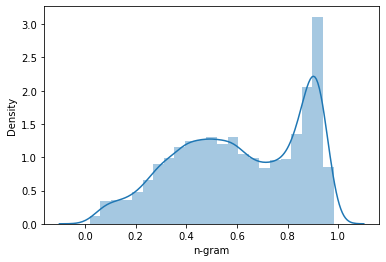

In [ ]:
sns.distplot(df['n-gram'])
plt.show()